# The Dow Jones Index Data Set

Dow Jones Index Data Set


Predict which stock will provide greatest rate of return

## Background into the data set

First we'll start by importing all the necessary libraries.

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Now we can read in the data set. We will have to remove the dollar sign from the data set as the dollar sign causes pandas to interpret these as strings. 

In [6]:
# Reading in the data set

from google.colab import files
uploaded = files.upload()

Saving dow_jones_index.data to dow_jones_index (1).data


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dow_jones_index.data']))
# Dataset is now stored in a Pandas Dataframe

In [8]:
# Showing the first 5 rows
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [9]:
# Showing how many rows and columns are in the dataset
rows, columns = df.shape

print(f"There are {rows} rows and {columns} columns")

There are 750 rows and 16 columns


In [10]:
# Setting the max number of rows and columns that are displayed
pd.options.display.max_rows = rows # Set max rows to number of rows in df (from https://pandas.pydata.org/pandas-docs/stable/options.html)
pd.options.display.max_columns = columns # Set max columns to number of columns in df (from https://pandas.pydata.org/pandas-docs/stable/options.html)

In [11]:
# Converting the date column into datetime format
df["date"] = pd.to_datetime(df["date"])

df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [12]:
# Removing dollar sign
dfStrip = df.loc[:,['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']].apply(lambda x : x.str.strip('$'))

In [13]:
# Checking first 5 rows
dfStrip.head(5)

,open,high,low,close,next_weeks_open,next_weeks_close
0,15.82,16.72,15.78,16.42,16.71,15.97
1,16.71,16.71,15.64,15.97,16.19,15.79
2,16.19,16.38,15.60,15.79,15.87,16.13
3,15.87,16.63,15.82,16.13,16.18,17.14
4,16.18,17.39,16.18,17.14,17.33,17.37


In [14]:
# Replacing the values with the dollar sign with the stripped versions
df.loc[:,['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']] = dfStrip.astype(float)

In [15]:
# Viewing dataset
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029
5,1,AA,2011-02-11,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,1.543878e+08,17.39,17.28,-0.632547,90,0.172712
6,1,AA,2011-02-18,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,1.146913e+08,16.98,16.68,-1.766780,83,0.173611
7,1,AA,2011-02-25,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,8.002390e+07,16.81,16.58,-1.368230,76,0.179856
8,1,AA,2011-03-04,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,1.329819e+08,16.58,16.03,-3.317250,69,0.180941
9,1,AA,2011-03-11,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,1.094931e+08,15.95,16.11,1.003130,62,0.187149


In [16]:
df.loc[:, ['stock','close']].groupby(by='stock').describe()

close                                                            
      count      mean       std     min     25%     50%     75%     max
stock                                                                  
AA     25.0   16.5044  0.772922   14.72   16.03   16.52   17.10   17.92
AXP    25.0   46.7124  2.396248   43.53   44.36   46.25   48.50   51.19
BA     25.0   73.4480  3.087631   69.10   71.64   72.69   74.84   79.78
BAC    25.0   13.0516  1.417382   10.52   11.93   13.37   14.25   15.25
CAT    25.0  103.1520  6.218651   92.75   99.59  103.54  107.21  115.41
CSCO   25.0   17.8992  1.984095   14.93   16.88   17.52   18.70   22.05
CVX    25.0  101.1756  5.267066   91.19   97.90  102.10  103.75  109.66
DD     25.0   52.8736  2.367048   48.35   50.29   52.91   54.63   56.79
DIS    25.0   41.2496  1.882473   37.58   39.45   41.52   42.95   43.56
GE     25.0   19.7840  0.912022   17.97   19.25   19.95   20.36   21.44
HD     25.0   36.5600  1.270213   33.47   36.00   37.01   37.42   38.48
HPQ    25.0   41.5364  4.263754   34.90   40.26   40.99   45.09   48.67
IBM    25.0  163.1016  5.730211  147.93  162.18  164.05  166.21  170.58
INTC   25.0   21.4352  1.072272   19.72   20.82   21.46   21.86   23.41
JNJ    25.0   62.6236  2.846177   58.57   60.01   62.55   65.69   66.77
JPM    25.0   44.4996  2.095094   39.49   43.15   44.91   45.74   48.00
KO     25.0   65.3264  1.970774   62.21   63.57   65.22   67.22   68.30
KRFT   25.0   32.5576  1.570584   30.53   31.26   31.70   34.08   35.23
MCD    25.0   77.2704  3.004153   72.99   75.01   76.14   80.36   82.52
MMM    25.0   91.6980  2.692709   86.23   90.25   91.80   93.22   97.21
MRK    25.0   34.3604  1.666357   31.91   33.06   34.04   35.82   37.35
MSFT   25.0   25.9208  1.416407   23.70   24.80   25.68   27.06   28.60
PFE    25.0   19.8216  0.915085   18.15   19.19   20.11   20.53   20.97
PG     25.0   64.0020  1.828795   60.60   62.59   64.30   65.27   67.36
T      25.0   29.6268  1.369257   27.49   28.43   30.34   30.71   31.41
TRV    25.0   59.1600  2.649218   53.33   57.92   59.21   61.18   63.43
UTX    25.0   84.0332  2.985547   79.08   82.52   83.52   85.32   89.58
VZ     25.0   36.4696  0.932820   34.95   35.84   36.31   37.26   38.47
WMT    25.0   53.9128  1.555639   51.52   52.54   53.66   55.29   56.70
XOM    25.0   82.1116  3.137743   75.59   79.78   82.63   84.50   87.98

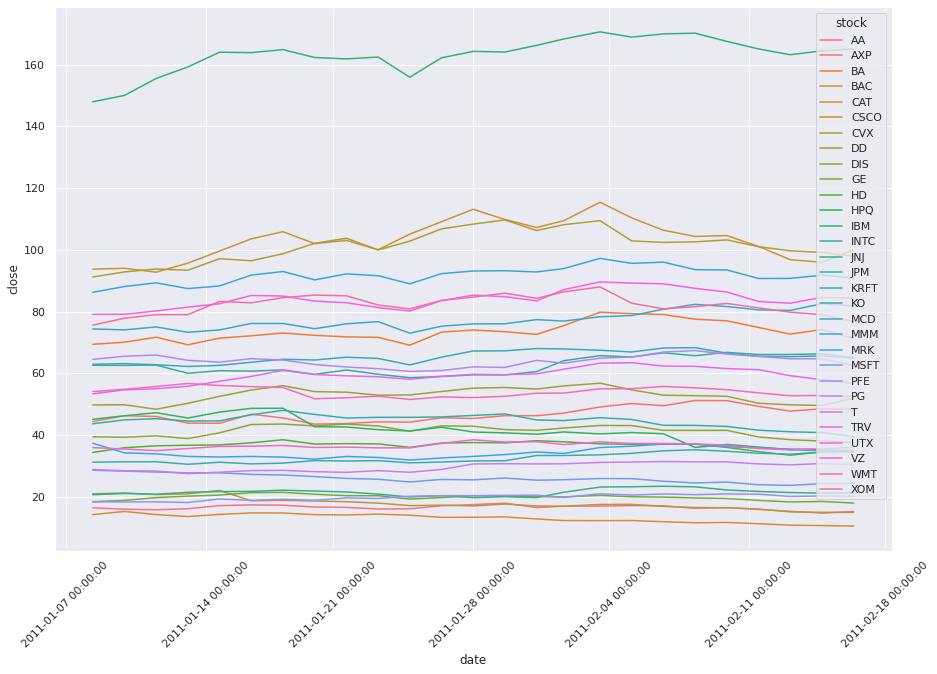

In [17]:
sns.set(rc={'figure.figsize':(15, 10)})

lineplot = sns.lineplot(data=df, x='date', y='close', hue='stock')

lineplot.set_xticklabels(df['date'],rotation=45)

plt.show()

In [18]:
AAQuotes = df.loc[df["stock"] == "AA", ["date", "open", "high", "low", "close"]]

In [21]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     - 306 kB 2.4 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=22b78a70d8e86643a0d76d678bdf6ebd9ac276bf2d64fa0f4ff95909b1bcbebd
  Stored in directory: /tmp/pip-ephem-wheel-cache-1j1wo0d6/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [22]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 421 kB/s 


In [23]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates


AAQuotes["date"] = mdates.date2num(AAQuotes["date"].values)

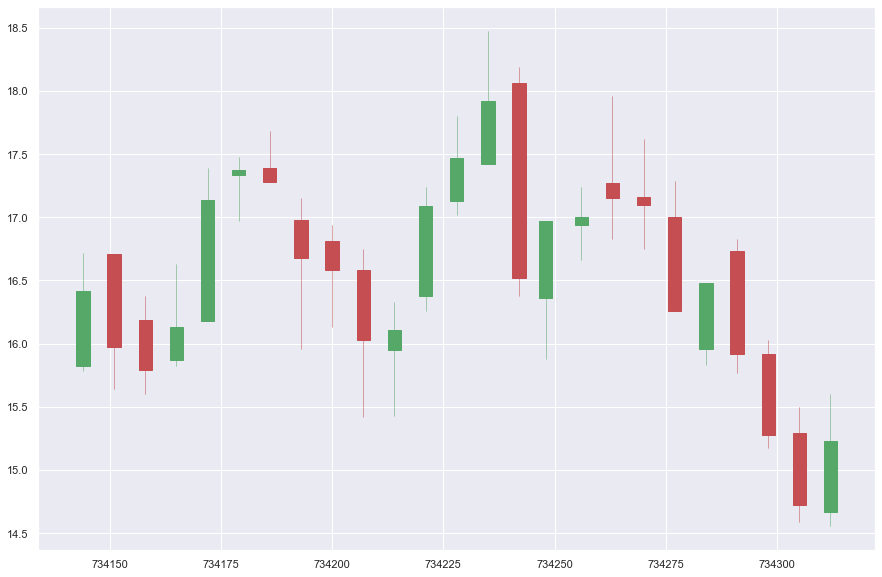

In [ ]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, 
                 quotes = AAQuotes.values, 
                 width=3,
                 colorup='g',
                 colordown='r',
                 alpha=1)

plt.show()

## Making Predictions

Every Dow Jones Index stock lost money in the week ending 5/27/2011. We will attempt to predict this fall.

### Predicting values for AA

In [24]:
from statsmodels.tsa.api import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
# Creating the model
model = VAR(AAQuotes[["open", "high", "low", "close"]].iloc[:14])

# Fitting the model
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
# Predicting one step ahead
prediction = model_fit.forecast(model_fit.y, steps=1)
print(prediction)

[[17.67322989 17.97923304 17.09793812 17.57665757]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [27]:
# Viewing the true values
AAQuotes[["open", "high", "low", "close"]].iloc[15]

open     16.36
high     16.97
low      15.88
close    16.97
Name: 363, dtype: float64

In [28]:
# Variation from the true values
AAQuotes[["open", "high", "low", "close"]].iloc[15].values - np.array(prediction)

array([[-1.31322989, -1.00923304, -1.21793812, -0.60665757]])

### Predicting opening values for all stocks for the week of 05/27/2011

In [29]:
pivotedDF = df[["date", "stock", "open", "high", "low", "close"]].pivot(index='date', values=["open", "high", "low", "close"], columns='stock')

pivotedDF

open                                                     ...  \
stock          AA    AXP     BA    BAC     CAT   CSCO     CVX     DD  ...   
date                                                                  ...   
2011-01-07  15.82  43.30  66.15  13.85   94.38  20.45   91.66  50.05  ...   
2011-01-14  16.71  44.20  69.42  14.17   93.21  20.94   90.95  48.30  ...   
2011-01-21  16.19  46.03  70.86  15.08   94.16  21.22   92.94  49.53  ...   
2011-01-28  15.87  46.05  71.52  14.25   92.71  20.84   93.89  48.44  ...   
2011-02-04  16.18  44.13  69.26  13.71   96.13  20.93   93.85  50.15  ...   
2011-02-11  17.33  43.96  71.43  14.51   99.62  22.11   97.28  52.62  ...   
2011-02-18  17.39  46.42  72.70  14.77  103.56  18.84   95.50  54.44  ...   
2011-02-25  16.98  44.94  72.35  14.38  104.86  18.73   99.23  54.95  ...   
2011-03-04  16.81  43.73  72.47  14.27  102.72  18.62  102.28  54.22  ...   
2011-03-11  16.58  43.86  71.60  14.18  103.42  18.36  104.12  54.10  ...   
2011-03-18  15.95  43.86  71.17  14.26  102.59  17.81   99.16  53.18  ...   
2011-03-25  16.38  44.75  70.29  14.20  106.90  17.34  103.86  53.80  ...   
2011-04-01  17.13  45.54  73.50  13.42  109.54  17.36  106.40  54.11  ...   
2011-04-08  17.42  45.61  73.38  13.40  113.75  17.01  108.52  55.50  ...   
2011-04-15  18.06  46.36  73.65  13.50  110.02  17.71  109.74  55.45  ...   
2011-04-21  16.36  45.85  72.72  12.59  105.58  16.88  104.95  54.28  ...   
2011-04-29  16.94  47.19  75.51  12.32  109.24  16.93  107.37  55.69  ...   
2011-05-06  17.27  49.37  80.35  12.36  116.24  17.51  109.48  56.42  ...   
2011-05-13  17.16  50.06  79.31  12.28  110.80  17.53  103.25  54.94  ...   
2011-05-20  17.00  49.42  78.66  11.89  105.87  16.82  102.03  52.74  ...   
2011-05-27  15.96  50.74  76.55  11.47  101.30  16.41  101.13  51.75  ...   
2011-06-03  16.73  51.39  77.80  11.87  106.41  16.59  104.61  53.18  ...   
2011-06-10  15.92  49.13  74.76  11.18  100.25  16.04  100.90  50.30  ...   
2011-06-17  15.29  47.96  73.06  10.89   96.93  15.14  100.04  50.03  ...   
2011-06-24  14.67  48.35  73.96  10.59   96.49  14.94   98.88  49.50  ...   

            close                                                   
stock         PFE     PG      T    TRV    UTX     VZ    WMT    XOM  
date                                                                
2011-01-07  18.34  64.50  28.85  53.33  79.08  35.93  54.08  75.59  
2011-01-14  18.34  65.53  28.43  54.63  79.08  35.46  54.81  77.84  
2011-01-21  18.36  65.91  28.33  55.00  80.20  34.95  55.73  78.98  
2011-01-28  18.15  64.20  27.49  55.81  81.43  35.63  56.70  78.99  
2011-02-04  19.30  63.61  27.97  57.41  82.52  36.31  56.03  83.28  
2011-02-11  18.83  64.73  28.47  58.99  85.20  36.39  55.69  82.82  
2011-02-18  19.19  64.30  28.57  60.92  85.01  36.62  55.38  84.50  
2011-02-25  18.86  62.84  28.13  59.60  83.37  35.97  51.75  85.34  
2011-03-04  19.66  62.03  27.92  59.18  82.86  36.08  52.07  85.08  
2011-03-11  19.47  61.49  28.46  58.88  81.28  35.85  52.59  82.12  
2011-03-18  20.18  60.60  27.94  58.06  80.16  35.84  51.52  80.85  
2011-03-25  20.35  60.88  28.85  58.98  83.52  37.29  52.35  83.62  
2011-04-01  20.38  62.08  30.62  59.71  85.32  38.47  52.13  84.68  
2011-04-08  20.46  61.90  30.71  59.58  84.81  37.72  52.54  85.95  
2011-04-15  20.53  64.18  30.65  59.80  83.45  37.85  53.55  84.29  
2011-04-21  19.79  63.27  30.68  61.32  87.10  36.91  53.58  86.36  
2011-04-29  20.97  64.90  31.12  63.28  89.58  37.78  54.98  87.98  
2011-05-06  20.55  65.27  31.26  63.43  89.21  37.28  55.02  82.69  
2011-05-13  20.92  66.86  31.41  62.33  88.98  37.26  55.72  80.87  
2011-05-20  20.69  67.36  31.32  62.25  87.50  37.15  55.29  81.57  
2011-05-27  20.93  66.20  31.29  61.52  86.33  36.67  54.70  82.63  
2011-06-03  20.84  65.43  30.65  61.18  83.24  35.63  53.66  81.18  
2011-06-10  20.11  64.70  30.34  59.21  82.70  35.19  52.72  79.78  
2011-06-17  20.26  64.69  30.77  57.92  84.57  35.51  52.82  7

In [30]:
model = VAR(pivotedDF.loc[:'5/20/2011'].values)

# Fitting the model
model_fit = model.fit()

In [31]:
# Predicting one step ahead (in this case, the week of 05/27/2020)
prediction = model_fit.forecast(model_fit.y, steps=1)
print(prediction)

[[ 16.59871361  48.79739931  77.30758038  11.54108748 103.56743756
   16.62491248 101.88160304  52.6781063   39.68955631  19.62824312
   36.27148687  38.50459088 169.55892457  23.02965075  67.21897856
   41.83251553  69.02444352  35.62764091  80.02259117  94.31067218
   37.00703748  24.69631756  20.49293814  67.01023872  31.65862871
   62.07967698  87.95955348  37.08082555  55.62054032  79.9801789
   16.84727679  52.34337689  79.86466815  11.8905518  107.90946577
   16.98286495 104.66147009  53.77304066  41.28131825  19.92076842
   37.45848343  38.87622018 172.11725452  24.44742526  68.68484563
   43.57427316  68.7079909   35.86739347  83.03994255  96.06868979
   38.51949956  25.41251715  21.60373885  67.78939085  31.66079195
   62.89815962  89.25402986  37.08948475  56.71027883  83.48984287
   15.93929362  49.02360987  74.80721577  11.22202613 100.6316818
   16.51462128 101.24533495  52.1684575   39.97318706  19.15071531
   36.35895688  36.60008637 166.55765907  23.38322739  66.699498

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [32]:
# Viewing the true values
pivotedDF.loc['5/27/2011']

       stock
open   AA        15.96
       AXP       50.74
       BA        76.55
       BAC       11.47
       CAT      101.30
       CSCO      16.41
       CVX      101.13
       DD        51.75
       DIS       41.15
       GE        19.32
       HD        36.00
       HPQ       35.58
       IBM      168.50
       INTC      22.92
       JNJ       65.19
       JPM       42.40
       KO        67.59
       KRFT      34.97
       MCD       81.53
       MMM       92.29
       MRK       36.67
       MSFT      24.21
       PFE       20.49
       PG        66.80
       T         31.00
       TRV       61.74
       UTX       86.41
       VZ        36.75
       WMT       54.90
       XOM       80.22
high   AA        16.48
       AXP       51.38
       BA        76.99
       BAC       11.69
       CAT      104.60
       CSCO      16.46
       CVX      103.86
       DD        52.56
       DIS       41.52
       GE        19.52
       HD        37.00
       HPQ       36.96
       IBM      168.6

In [33]:
# Variation from the true values
prediction - pivotedDF.loc['5/27/2011'].values 

array([[ 6.38713611e-01, -1.94260069e+00,  7.57580384e-01,
         7.10874766e-02,  2.26743756e+00,  2.14912478e-01,
         7.51603041e-01,  9.28106299e-01, -1.46044369e+00,
         3.08243118e-01,  2.71486871e-01,  2.92459088e+00,
         1.05892457e+00,  1.09650749e-01,  2.02897856e+00,
        -5.67484474e-01,  1.43444352e+00,  6.57640914e-01,
        -1.50740883e+00,  2.02067218e+00,  3.37037476e-01,
         4.86317556e-01,  2.93813690e-03,  2.10238725e-01,
         6.58628706e-01,  3.39676982e-01,  1.54955348e+00,
         3.30825548e-01,  7.20540319e-01, -2.39821098e-01,
         3.67276788e-01,  9.63376893e-01,  2.87466815e+00,
         2.00551796e-01,  3.30946577e+00,  5.22864952e-01,
         8.01470088e-01,  1.21304066e+00, -2.38681749e-01,
         4.00768416e-01,  4.58483426e-01,  1.91622018e+00,
         3.51725452e+00,  1.41742526e+00,  1.91484563e+00,
         6.54273156e-01,  8.07990901e-01,  8.07393474e-01,
        -4.00574524e-02,  2.59868979e+00,  1.47949956e+0

### How much do the predicted open values vary from the true values?

In [34]:
(prediction[0][:30] - pivotedDF.loc['5/27/2011', 'open'].values)

array([ 0.63871361, -1.94260069,  0.75758038,  0.07108748,  2.26743756,
        0.21491248,  0.75160304,  0.9281063 , -1.46044369,  0.30824312,
        0.27148687,  2.92459088,  1.05892457,  0.10965075,  2.02897856,
       -0.56748447,  1.43444352,  0.65764091, -1.50740883,  2.02067218,
        0.33703748,  0.48631756,  0.00293814,  0.21023872,  0.65862871,
        0.33967698,  1.54955348,  0.33082555,  0.72054032, -0.2398211 ])

In [35]:
# Predicted move down
(np.array(prediction)[0][:30] - pivotedDF.loc['5/20/2011', 'close'].values)

array([ 0.33871361, -2.39260069, -0.21241962, -0.03891252, -0.76256244,
        0.09491248, -0.68839696, -0.0618937 , -1.81044369,  0.00824312,
       -0.77851313,  2.52459088, -0.60107543, -0.19034925,  1.52897856,
       -1.29748447,  0.72444352,  0.39764091, -2.30740883,  0.75067218,
       -0.05296252,  0.20631756, -0.19706186, -0.34976128,  0.33862871,
       -0.17032302,  0.45955348, -0.06917445,  0.33054032, -1.5898211 ])

In [36]:
# Actual move down
(pivotedDF.loc['5/27/2011', 'open'].values - pivotedDF.loc['5/20/2011', 'close'].values)

array([-0.3 , -0.45, -0.97, -0.11, -3.03, -0.12, -1.44, -0.99, -0.35,
       -0.3 , -1.05, -0.4 , -1.66, -0.3 , -0.5 , -0.73, -0.71, -0.26,
       -0.8 , -1.27, -0.39, -0.28, -0.2 , -0.56, -0.32, -0.51, -1.09,
       -0.4 , -0.39, -1.35])

As we can see from the above, the model doesn't accurately predict that the opening value on week 05/27/2011 is down on each stock from the closing week previously. Improvements could be made with better feature selection or a different model. A grid search algorithm or a genetic algorithm could be used to select the features and/or hyperparameters. A RNN model may work better than a VAR.